# K-Means Clustering

### Random 하게 생성된 toy dataset 으로 K-Means clustering test

make_blobs : 
```
    Input :
         n_samples :  cluster 에 균등 분할될 total data point 숫자  
         centers : generate 할 centroid 숫자  
         cluster_std : cluster 의 standard deviation    

    Output : 
        X: 생성된 sample 들  
        y: 각 sample 의 label
```
KMeans :  
> init : initialization method -> k-means++ (smart choosing of centroids)  
> n_clusters : k 값  
> n_init : 반복횟수  

DBSCAN :

>eps : epsilon (radius)  
>min_sample : minimum samples within the radius

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
%matplotlib inline

In [2]:
np.random.seed(0)

In [3]:
X, _ = make_blobs(n_samples=5000, centers=4, cluster_std=0.9)

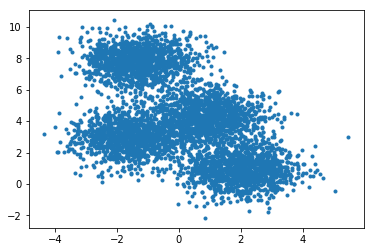

In [4]:
plt.scatter(X[:,0], X[:,1], marker='.')

In [5]:
X.shape

(5000, 2)

In [6]:
k_means = KMeans(n_clusters=4, n_init=12)

In [7]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [8]:
k_means_labels = k_means.labels_
k_means_labels

array([1, 2, 2, ..., 0, 0, 0])

In [9]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-1.28544081,  7.82125027],
       [ 2.03181694,  0.89486996],
       [-1.58788783,  2.8982743 ],
       [ 0.96586618,  4.32099254]])

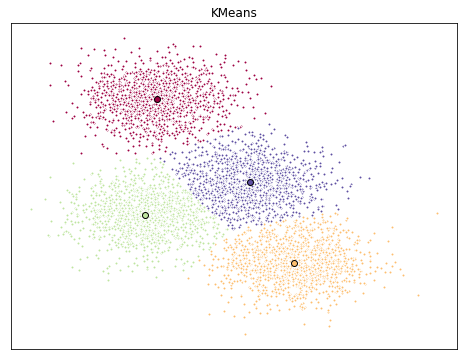

In [10]:
fig = plt.figure(figsize=(8,6))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))
ax = fig.add_subplot(1,1,1)

for k, col in zip(range(len(k_means_cluster_centers)), colors):
    my_members = (k_means_labels == k)
    cluster_center = k_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)

ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.show()

# DBSCAN

In [11]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets.samples_generator import make_blobs
%matplotlib inline

In [12]:
centroidLocation = [[3,2], [1,-1],[-1,2]]

X, _ = make_blobs(n_samples=1500, centers=centroidLocation, cluster_std=0.5)

In [13]:
epsilon = 0.3
minimumSamples = 7
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_
print(labels.shape)
print(labels)
print(db.core_sample_indices_.shape)
print(db.core_sample_indices_)

(1500,)
[0 1 1 ... 2 2 0]
(1411,)
[   0    1    2 ... 1497 1498 1499]


In [14]:
set(labels)       # -1 : outlier

{-1, 0, 1, 2}

In [15]:
unique_labels = set(labels)

In [16]:
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


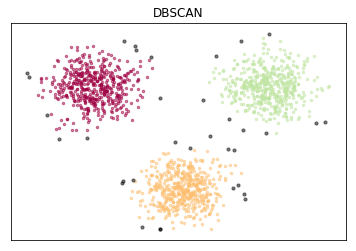

In [17]:
for k, col in zip(unique_labels, colors):

    my_members = (labels == k)
    
    if k == -1:
        plt.scatter(X[my_members, 0], X[my_members, 1], c='k', marker=u'o', s=10, alpha=0.5)
    else:
        plt.scatter(X[my_members, 0], X[my_members, 1], c=col, marker=u'o', s=6, alpha=0.5)

plt.title('DBSCAN')
plt.xticks(())
plt.yticks(())
plt.show()

# 실습 - Iris dataset 을 이용한 KMeans Clustering

In [18]:
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

iris = datasets.load_iris()

X = iris.data

In [19]:
df = pd.DataFrame(X, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [58]:
# your code below